Data Mining: Basic Concepts - Winter 2023/24
---------------
``` 
> University of Konstanz 
> Department of Computer and Information Science
> Maximilian T. Fischer, Frederik Dennig, Yannick Metz, Udo Schlegel
```
__Organize in teams of 2 people, return the exercise on time using ILIAS__

---

Assignment 05 in Python 
---------------
- ___Please put your names and student IDs here___:
    - _Name_, _Student ID_
    - _Name_, _Student ID_

---

## Exercise 1: Pruning Decision Trees With Cost-Complexity Pruning
 To get an idea of what values of the cost complexity parameter ``ccp_alpha`` could be appropriate, scikit-learn provides `DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process.

Use the breast cancer dataset form `scikit-learn` (loaded via `load_treast_cancer`) for your training and test sets.

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

In [50]:
# Code here
cancer = load_breast_cancer()
train_features, test_features =  train_test_split(cancer.data, test_size=0.2, random_state=0)
train_target, test_target = train_test_split(cancer.target, test_size=0.2, random_state=0)

model = DecisionTreeClassifier(random_state=0)
model.fit(train_features, train_target)
alphas = model.cost_complexity_pruning_path(train_features, train_target)

#### (a) Plot effective alpha and the total impurity of leaves. Explain what the plot shows. Make sure to remove the maximum effective alpha (to avoid the inclusion of a trivial decision tree.)

<Axes: >

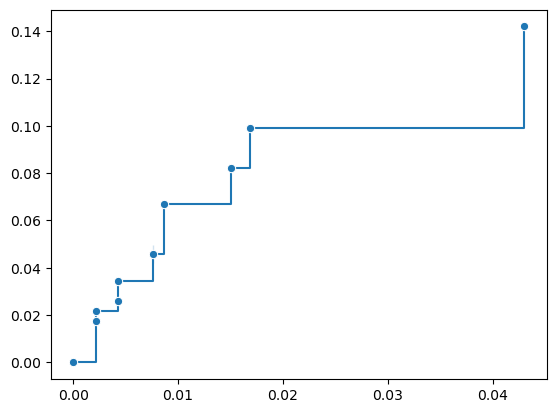

In [51]:
# Code here
import seaborn as sns
sns.lineplot(x=alphas["ccp_alphas"][:-1], y=alphas["impurities"][:-1], marker="o", drawstyle="steps-post")

##### (b) Train a decision tree for each effective alpha and save the models (e.g. withina a for loop)

In [52]:
# Code here

trees = []

for alpha in alphas["ccp_alphas"][:-1]:
    model = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    model.fit(train_features, train_target)
    trees.append(model)

##### (c) Create a plot that shows that the number of nodes and tree depth decreases as alpha increases, based on the decision trees you have trained in (b).

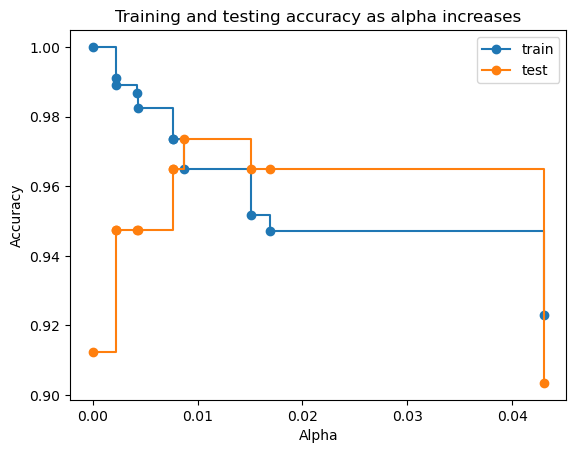

In [58]:
# Code here
accuracy_train = [tree.score(train_features, train_target) for tree in trees]
accuracy_test = [tree.score(test_features, test_target) for tree in trees]

alpha = alphas["ccp_alphas"][:-1]

ax = plt.subplot()
ax.plot(alpha, accuracy_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(alpha, accuracy_test, marker="o", label="test", drawstyle="steps-post")
ax.set(xlabel="Alpha", ylabel="Accuracy", title="Training and testing accuracy as alpha increases")
ax.legend()

## Exercise 2: Bayesian Networks

You are going to find a Bayesian network structures that best fit some the Titanic passenger survival dataset. The data provides information on the fate of passengers on the "Titanic", with features such as economic status (class), sex, age and survival. The data was discretized in order to let you only deal with discrete variables.

##### __(a) Load the Titanic dataset and use the structure learning in the `pomegranate` package to generate a `BayesianNetwork.from_samples()`.__ 
__Use the `exact` algorithm parameter and **plot** the resulting Bayesian network.__

_(Hint: the input has to be a `X:array-like, shape (n_samples, n_nodes)` and you can resize the plot using the `plt.figure(figsize=(float, float)`)_

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
from pomegranate import BayesianNetwork

# You may find the pygraphviz package helpful for plotting. 
# If you want to use it, we recommend installing it via '!conda install -c conda-forge pygraphviz'

ModuleNotFoundError: No module named 'pomegranate'

In [21]:
# Code here

##### __(b) Describe the resulting Bayesian network which you plotted in (a) and explain why Bayesian networks are useful.__ 

Answer here

## Exercise 3: Support Vector Machines 
In this exercise we will train a SVM to classify tumors into canerous and non-cancerous. 

In [61]:
%matplotlib inline
import pandas as pd 
import numpy as np 
import seaborn as sns 

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

##### __(a) Transform the data into a dataframe__

In [76]:
# Code here
df = pd.concat([pd.DataFrame(data["data"], columns=data["feature_names"]), pd.DataFrame({"target": data["target"]})], axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


##### __(b) Display the following attributes `mean compactness`,  `mean concavity`,  `mean concave points`, `mean symmetry` of cancer dataset using the `sns.pairplot()` method.__
__Color canerous and non-cancerous data points in the scatterplot matrix.__

/home/kssrr/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


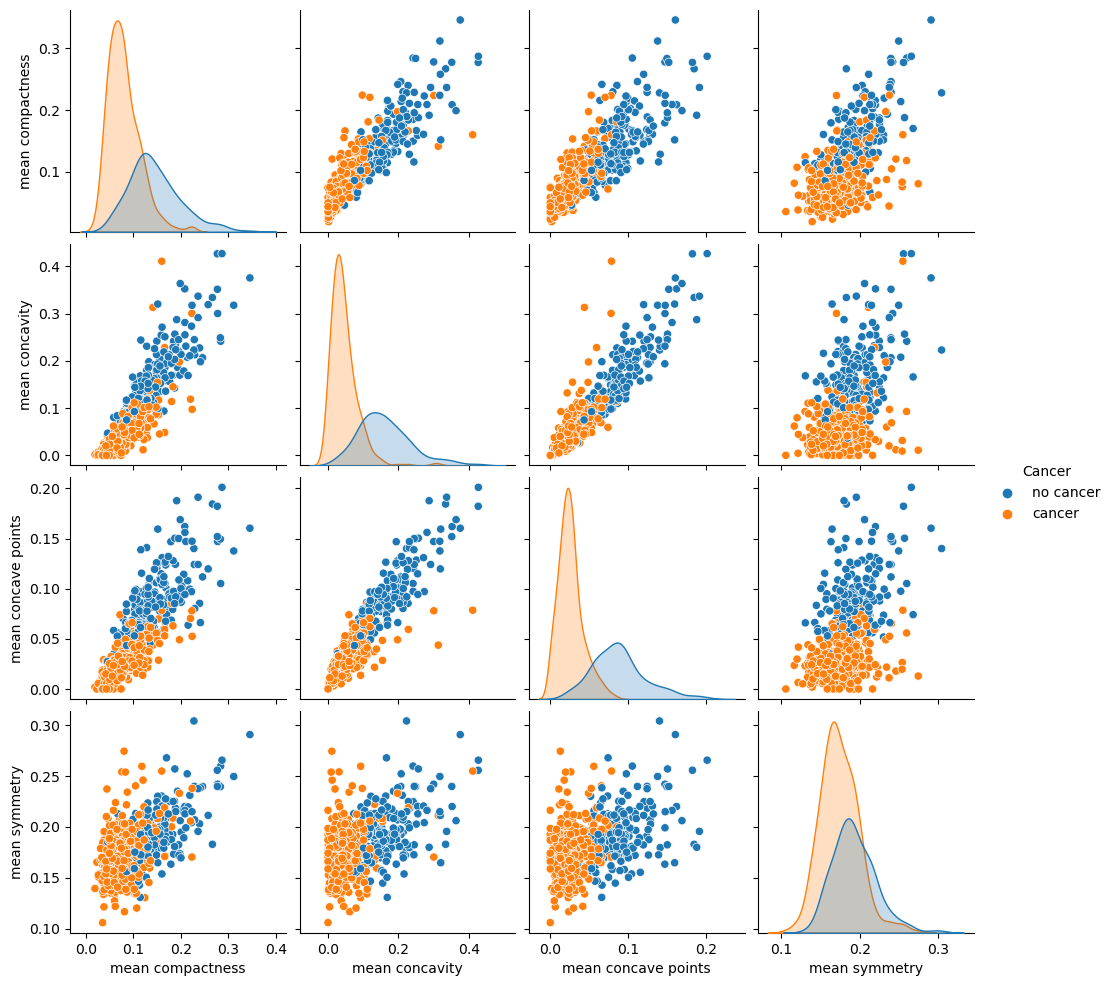

In [82]:
# Code here
df["Cancer"] = ["cancer" if x == 1 else "no cancer" for x in df["target"]]
sns.pairplot(data=df[["mean compactness", "mean concavity", "mean concave points", "mean symmetry", "Cancer"]], hue="Cancer")

In [85]:
df = df.drop("Cancer", axis=1)

##### __(c) Create a training (75%) and test (25%) dataset using.__
_(Hint: use the `sklearn.model_selection.train_test_split` method and the parameter `random_state=0`)_

In [86]:
# Code here
train, test = train_test_split(df, test_size=0.25, random_state=0)

##### __(d) Train a SVM (support vector machine) using the `sklearn.svm.SVC` and compute the accuracy on the training and test data.__
_(Hint: use the `sklearn.metrics.accuracy_score` for the accuracy)_

In [90]:
# Code here
from sklearn.svm import SVC

features = data["feature_names"]
target = "target"

model = SVC()
model.fit(train[features], train[target])

SVC()

In [92]:
from sklearn.metrics import accuracy_score

test_pred = model.predict(test[features])
accuracy_test = accuracy_score(y_true=test[target], y_pred=test_pred)

train_pred = model.predict(train[features])
accuracy_train = accuracy_score(y_true=train[target], y_pred=train_pred)

print(f"Training accuracy: {accuracy_train}\nTest accuracy: {accuracy_test}")

Training accuracy: 0.903755868544601
Test accuracy: 0.9370629370629371


##### __(e) Normalize (min-max-normalization) each column of the DataFrame generated in (a).__
_(Hint: do not use any library other then `pandas` for this)_

In [94]:
# Code here
normalized = (df-df.min())/(df.max()-df.min())
normalized["target"] = df["target"]
normalized.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,0
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,0


##### __(f) Split the normalized data again into a training and test dataset.__ _(Hint: for the splitting use same parameters as in (c))_ 
__Train a SVM with the normalized data and compute again the accuracy for the normalized training and test data.__

In [95]:
# Code here
ntrain, ntest = train_test_split(normalized, test_size=0.25)

norm_model = SVC()
norm_model.fit(ntrain[features], ntrain[target])

ntest_pred = model.predict(ntest[features])
accuracy_ntest = accuracy_score(y_true=ntest[target], y_pred=ntest_pred)

ntrain_pred = model.predict(ntrain[features])
accuracy_ntrain = accuracy_score(y_true=ntrain[target], y_pred=ntrain_pred)

print(f"Training accuracy: {accuracy_ntrain}\nTest accuracy: {accuracy_ntest}")

Training accuracy: 0.6126760563380281
Test accuracy: 0.6713286713286714


##### __(g) Compare and explain the results of (d) and (f). Explain the differences in accuracy that result from normalization.__

Answere here